In [15]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
# Model Evaluation metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from collections import  Counter
import string
from nltk.stem import WordNetLemmatizer,PorterStemmer

from nltk.tokenize import word_tokenize
# import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS


ImportError: cannot import name 'Stopwords' from 'nltk.stem' (d:\AnacondaPython3\lib\site-packages\nltk\stem\__init__.py)

In [3]:
from datetime import datetime
now = datetime.now() # current date and time
d = now.strftime("%d%m%Y")
print(d)

11072022


In [29]:
mlbb=pd.read_csv( "hasil/2_mlbb_clean_sentiment07072022.csv",encoding='utf-8')
ffm=pd.read_csv( "hasil/2_ffm_clean_sentiment07072022.csv",encoding='utf-8')
hdi=pd.read_csv( "hasil/2_hdi_clean_sentiment07072022.csv",encoding='utf-8')
all=pd.read_csv( "hasil/all_game_cleancontent_08072022_noneutral.csv",encoding='utf-8')
mlbb = mlbb[['clean_content','score','label','sentiment']]
ffm = ffm[['clean_content','score','label','sentiment']]
hdi = hdi[['clean_content','score','label','sentiment']]

#get sampling data random
all= all.sample(n=2000,replace=True,random_state=42)
#get sampling random 50% of data random 
# df = df.sample(n=3,replace=True,frac=0.5,random_state=42)

In [7]:
all.shape

(2000, 6)

In [17]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english')) #for english


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
corpus=[]
kamus= all['clean_content'].str.split()
kamus=kamus.values.tolist()
corpus=[word for i in kamus for word in i]


dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 4 artists>

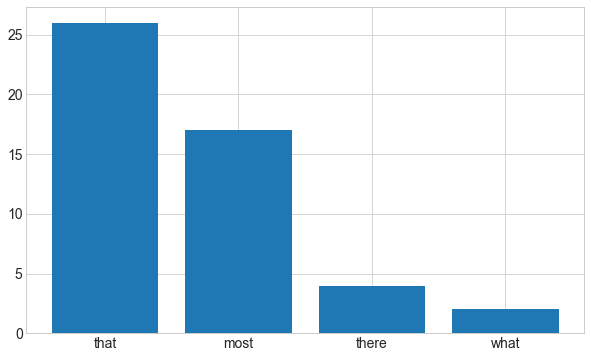

In [44]:
# Plot top stopwords

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [45]:
# Code Snippet for Character Length Histogram

def plot_character_length_histogram(text):
    text.str.len().\
        hist()

In [46]:
# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

In [49]:
# Code Snippet for Word Length Histogram
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

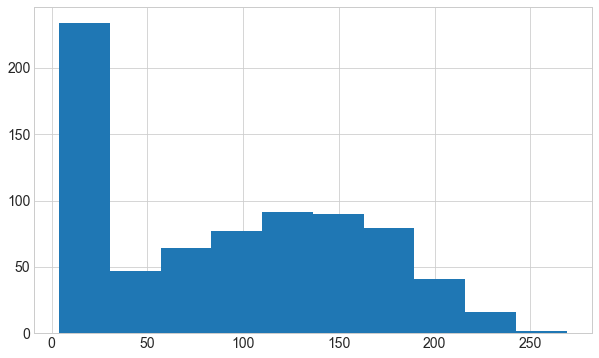

In [47]:
plot_character_length_histogram(mlbb['clean_content'])

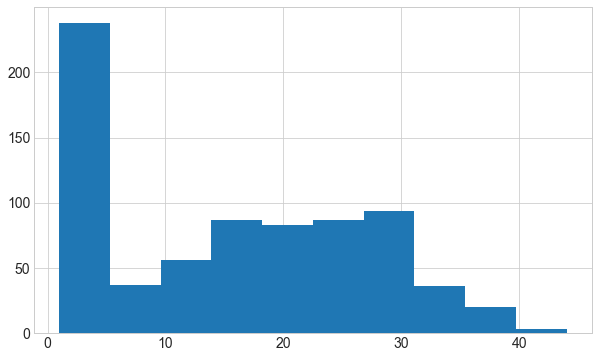

In [48]:
plot_word_number_histogram(mlbb['clean_content'])

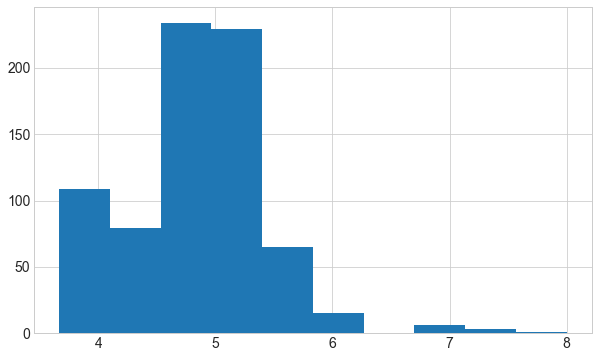

In [50]:
plot_word_length_histogram(mlbb['clean_content'])

In [51]:
# Code Snippet for Top Stopwords Barchart
def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    dic = defaultdict(int)
    x, y = [], []
    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*top)
    plt.bar(x, y)

In [53]:
plot_top_stopwords_barchart(mlbb['clean_content'])

AttributeError: 'set' object has no attribute 'words'

In [ ]:
# Code Snippet for Top Non-Stopwords Barchart
def plot_top_in_stopwords_barchart(text):
    stop = set(stopwords.words('indonesian'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    dic = defaultdict(int)
    counter = Counter(corpus)
    # print(counter)
    most = counter.most_common()
    print(most[:60])
    x, y = [], []
    for word, count in most[:60]:
        if word in stop:
            dic[word] += 1
            x.append(word)
            y.append(count)
    # plt.bar(x,y)
    print(x)

    # sns.barplot(x=y,y=x)

In [19]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [23]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [10, 6]})
plt.style.use('seaborn-whitegrid')

# Most Common Word

<AxesSubplot:>

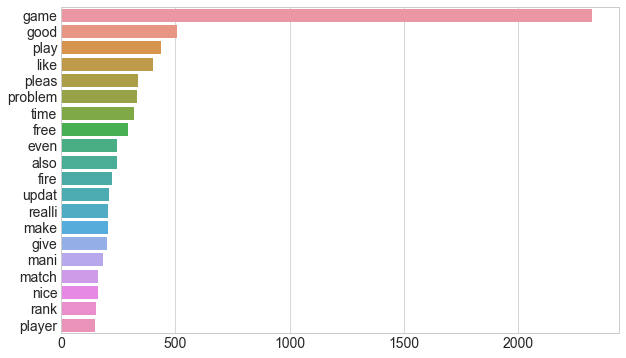

In [33]:
counter=Counter(corpus)
most=counter.most_common()

x, y=[], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [42]:
# Code Snippet for Top Non-Stopwords Barchart
def plot_top_in_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    dic = defaultdict(int)
    counter = Counter(corpus)
    # print(counter)
    most = counter.most_common()
    print(most[:60])
    x, y = [], []
    for word, count in most[:60]:
        if word in stop:
            dic[word] += 1
            x.append(word)
            y.append(count)
    # plt.bar(x,y)
    print(x)

    # sns.barplot(x=y,y=x)

In [43]:
plot_top_in_stopwords_barchart(mlbb['clean_content'])

AttributeError: 'set' object has no attribute 'words'

# N-Gram Analysis

## Tri-Gram

<AxesSubplot:>

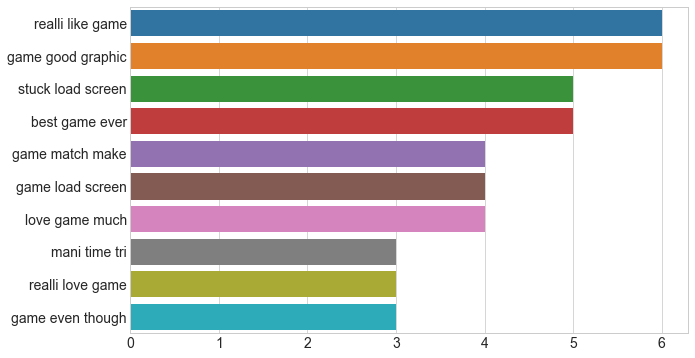

In [38]:
top_n_trigrams=get_top_ngram(mlbb['clean_content'],3)[:10]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

# Wordcloud

In [41]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1 
        )
    
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

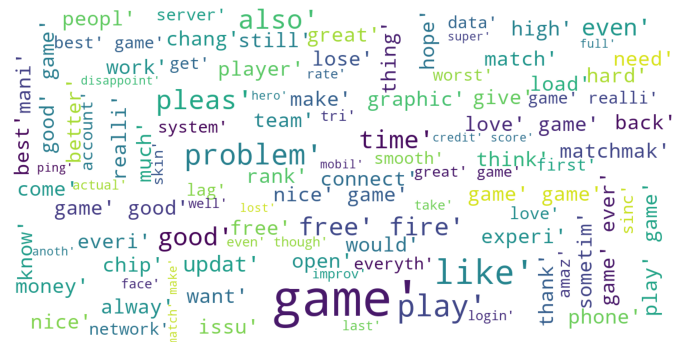

In [40]:
show_wordcloud(corpus)

## SAVE DATASET

In [75]:
X_train.to_csv( "hasil/"+folder+"/4_1_"+folder+"_train_data_"+str(dtlatih)+"_"+d+".csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/"+folder+"/4_1_"+folder+"_test_data_"+str(dtuji)+"_"+d+".csv", index=False, encoding='utf-8-sig')

# FEATURE EXTRACTION TFIDF

In [76]:
# ngram_range = (1,2) #bigram
ngram = (1,3) #trigram
fs="trigram"

mindf = 5

tfidf = TfidfVectorizer(ngram_range=ngram, min_df=mindf)
vectors = tfidf.fit_transform(dataset.clean_content).toarray()

In [77]:
X_train_to_df = tfidf.fit_transform(X_train).toarray()
train_words_df = pd.DataFrame(X_train_to_df, columns=tfidf.get_feature_names())
train_words_df.head(10)
train_words_df.to_csv( "hasil/"+folder+"/4_1_tfidf_training_data_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')

In [78]:
X_test_to_df = tfidf.transform(X_test).toarray()
test_words_df = pd.DataFrame(X_test_to_df, columns=tfidf.get_feature_names())
test_words_df.head(10)
test_words_df.to_csv( "hasil/"+folder+"/4_1_tfidf_testing_data_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')

# PIPELINE & GRIDSEARCH TEST

In [80]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from pprint import pprint
from time import time


In [116]:

pipe = Pipeline([
    ('bag_of_words', TfidfVectorizer(ngram_range=ngram, min_df=mindf)),
    ('estimator', SVC(random_state=42))])

#create GridSearchCV object with set of possible parameters
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10,100]
kernel = ['linear','rbf','poly','sigmoid']
# kernel = ['rbf']
param_grid={
    'estimator__C': Cs,
    'estimator__gamma': gammas,
    'estimator__kernel': kernel
}

In [130]:
%%time
# scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}
# scoring=['accuracy','recall_macro','precision_macro','f1_macro']
grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Wall time: 30.9 s


In [110]:

# print(classification_report(, y_test )) #print classification report
print("Performing grid search...")
print("pipeline:", [name for name, _ in pipe.steps])
print("param_grid:")
pprint(param_grid)
t0 = time()

print("done in %0.3fs" % (time() - t0))
timelapse=("Time : done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid.best_score_)
bestscore=("Best score: %0.3f" % grid.best_score_)
print("Best parameters set:")
best_parameters = grid.best_estimator_.get_params()
# print(best_parameters)
bestparam=[]
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (str(param_name), str(best_parameters[param_name])))
    bestparam=bestparam+[{'Parameter':str(param_name),'value':str(best_parameters[param_name]),'training':str(dtlatih)}]
    # bestjoin=bestjoin+"\n"+("\t%s: %r" % (param_name, best_parameters[param_name])).join(bestjoin)
    # bestparam="".join(bestparam)

Performing grid search...
pipeline: ['bag_of_words', 'estimator']
param_grid:
{'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'estimator__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
 'estimator__kernel': ['rbf']}
done in 0.000s

Best score: 0.794
Best parameters set:
	estimator__C: '1'
	estimator__gamma: '1'
	estimator__kernel: 'rbf'


In [ ]:
grid.cv_results_

In [118]:
resultgs=pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["accuracy"])],axis=1)
resultgs.head()

,estimator__C,estimator__gamma,estimator__kernel,f1
0,0.001,0.001,linear,0.347623
1,0.001,0.001,rbf,0.347623
2,0.001,0.001,poly,0.347623
3,0.001,0.001,sigmoid,0.347623
4,0.001,0.010,linear,0.347623


In [119]:
bestpara=pd.DataFrame(bestparam)
bestpara.head()

,Parameter,value,training
0,estimator__C,1,70
1,estimator__gamma,1,70
2,estimator__kernel,rbf,70


In [120]:

resultgs.to_csv( "hasil/"+folder+"/4_1_resultgs_all_classifier_accuracy_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')
bestpara.to_csv( "hasil/"+folder+"/4_1_bestparameter_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')
with open('hasil/'+folder+'/4_1_gridsearch_'+folder+'_'+str(dtlatih)+'-'+str(dtuji)+'_'+fs+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n')
    f.writelines((timelapse)+'\n')
    f.writelines((bestscore)+'\n')
    f.writelines('Best Parameter set:'+'\n'+(str(bestparam)))

In [121]:
grid_predictions = grid.predict(X_test)
 
# print classification report
# print(classification_report(y_test, grid_predictions,output_dict=True))
report=pd.DataFrame(classification_report(y_test, grid_predictions,output_dict=True)).T

In [122]:
print(report)
report.to_csv( "hasil/"+folder+"/4_1_testreport_gridsearch_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')

              precision    recall  f1-score     support
0              0.833828  0.878125  0.855403  320.000000
2              0.851711  0.800000  0.825046  280.000000
accuracy       0.841667  0.841667  0.841667    0.841667
macro avg      0.842769  0.839063  0.840225  600.000000
weighted avg   0.842173  0.841667  0.841237  600.000000


In [123]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid.predict(X_test)
class_report=classification_report(y_true, y_pred)
matrix=confusion_matrix(y_true, y_pred)
print(class_report)
print()
print(matrix)
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       320
           2       0.85      0.80      0.83       280

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600


[[281  39]
 [ 56 224]]



In [124]:
label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,  
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted positive
Is negative,281,39
Is positive,56,224


In [125]:
print(matrix)

[[281  39]
 [ 56 224]]


In [126]:
with open('hasil/'+folder+'/4_1_evaluasi_'+folder+'_'+str(dtlatih)+'-'+str(dtuji)+'_'+fs+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n'+(matrix))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('int64')) -> None

In [127]:
C=1
gam=1
# Create and train a random forest classifier
# forest = RandomForestClassifier()
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=gam,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          ('SVC Sigmoid ', SVC(kernel='sigmoid',C=C,gamma=gam)),
          # ('Naive Bayes', MultinomialNB()),
          # ('Decision Tree', DecisionTreeClassifier()),
          # ('Random Forest',RandomForestClassifier(n_estimators=50)),
          # ('Regresi Linier',LogisticRegression()),
        ]


In [128]:
pelatihan=[]
for name, clf in models:
  clf.fit(X_train_to_df, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train_to_df))
  latih=('Dataset {}, data split : {}:{} \n'.format(folder,(1-jmluji)*100,jmluji*100))
  pelatihan=pelatihan+[{'classifier':name,'akurasi':train_acc,'C':C,'Gamma':gam,'training':str(dtlatih)}]
  printed_dataset=('Dataset: {} \t'.format(folder))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/'+folder+'/4_1_training_svm_'+folder+'_'+str(dtlatih)+'-'+str(dtuji)+'_'+fs+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n'+(latih))
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)
  # print(classification_report(clf.fit(X_train_to_df, y_train),y_train))

  
df_pelatihan=pd.DataFrame(pelatihan)
print(df_pelatihan)
df_pelatihan.to_csv( "hasil/"+folder+"/4_1_training_svm_"+folder+"_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.8678571428571429 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.9285714285714286 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9414285714285714 

[INFO] Training Menggunakan SVC Sigmoid , akurasi pada training set: 0.8128571428571428 

                  classifier   akurasi  C  Gamma training
0          SVC linear kernel  0.867857  1      1       70
1             SVC RBF kernel  0.928571  1      1       70
2  SVC Polynomial (degree 3)  0.941429  1      1       70
3               SVC Sigmoid   0.812857  1      1       70


In [129]:
label_names = pd.Series(['negative', 'positive'])
pengujian=[]
for name, clf in models:
  clf.predict(X_test_to_df)
  test_acc = accuracy_score(y_test, clf.predict(X_test_to_df))
  latih=('Dataset {}, data split : {}:{} \n'.format(folder,(1-jmluji)*100,jmluji*100))
  pengujian=pengujian+[{'classifier':name,'akurasi':test_acc,'C':C,'Gamma':gam,'testing':str(dtuji)}]
  printed_dataset=('Dataset: {} \t'.format(folder))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  with open('hasil/'+folder+'/4_1_testing_svm_'+folder+'_'+str(dtlatih)+'-'+str(dtuji)+'_'+fs+'_'+d+'.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n'+(latih))
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)
  print(classification_report(clf.predict(X_test_to_df),y_test))
  test_matrix=(confusion_matrix(clf.predict(X_test_to_df),y_test))
  df_test=pd.DataFrame(test_matrix,  
     columns='Predicted ' + label_names,
     index='Is ' + label_names)


df_pengujian=pd.DataFrame(pengujian)
print(df_pengujian)
df_pengujian.to_csv( "hasil/"+folder+"/4_1_testing_svm_"+folder+"_"+str(dtlatih)+'-'+str(dtuji)+"_"+fs+"_"+d+".csv", index=False, encoding='utf-8-sig')

[INFO] Testing Menggunakan SVC linear kernel, akurasi pada testing set: 0.7916666666666666 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       313
           2       0.79      0.77      0.78       287

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600

[INFO] Testing Menggunakan SVC RBF kernel, akurasi pada testing set: 0.8416666666666667 

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       337
           2       0.80      0.85      0.83       263

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

[INFO] Testing Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.8166666666666667 

              precision    recall  f1-score   support

       